# Lecture 4

## Random Experiments and Simulations

Consider the following questions:

1) If you flip a coin 20 times, how many times do you think it will come up heads?

2) If you flip the coin 20 times and it comes up heads 6 times, do you think it is a fair or unfair coin? How confident can you be in your answer?

Can you conduct an experiment to answer these questions? 

What problems may you encounter in conducting this experiment? How can we overcome these problems?

1) We expect the answer will be about 10 because the coin will come up heads one-half the time

2) We don't know yet how to answer this

If we take a fair coin and flip it 20 times and count the number of heads, and then repeat that experiment many times, we can estimate how often 6 or fewer heads occurs. If it occurs very rarely (say, less than 5% of the time, then we can say that the coin is unlikely to be fair)

*Here we use 6 or fewer heads because if 5 heads occurs, that is an even  more extreme outcome than 6 heads occuring, and so we want to count up how often we see an outcome as extreme OR MORE as 6 heads occurring*

The problem is that we may need to repeat the experiment (of flipping the coin 20 times) many times to accurately estimate how often 6 or fewer heads come up. This may require thousands of coin flips

We can overcome this problem by using a computer to flip the coin in a **simulation**. A **computer simulation** is a computer program that models reality and allows us to conduct experiments that:
* would require a lot of time to carry out in real life
* would require a lot of resources to carry out in real life
* would not be possible to repeat in real life (for instance, simulation of the next day's weather or stock market performance)

Let's build simulations of our coin flip experiment and learn about some Python libraries

In [1]:
import random

In [2]:
faces=['H','T'] #sample space

In [3]:
random.choices(faces,k=20)

['H',
 'H',
 'H',
 'H',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'T',
 'T',
 'T',
 'T',
 'H',
 'T',
 'H',
 'T',
 'H',
 'H']

In [4]:
?random.choices

In [5]:
coins=random.choices(faces,k=20)

In [6]:
coins.count('H')

13

In [7]:
num_sims = 20
flips = 20
for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    print(coins.count('H'))

9
9
8
12
9
17
7
10
9
12
7
11
11
10
9
11
9
8
9
11


Suppose we want to see how often 6 or fewer heads occurs. We can reduce the printing by only printing those extreme events:

In [8]:
num_sims = 1000
flips = 20
for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads = coins.count('H')
    if num_heads <= 6:
        print(sim,':',num_heads,"Heads")

6 : 5 Heads
9 : 5 Heads
15 : 5 Heads
28 : 6 Heads
60 : 5 Heads
63 : 4 Heads
77 : 5 Heads
125 : 5 Heads
153 : 6 Heads
172 : 5 Heads
183 : 6 Heads
201 : 5 Heads
213 : 5 Heads
240 : 6 Heads
241 : 6 Heads
242 : 6 Heads
267 : 6 Heads
279 : 6 Heads
304 : 5 Heads
322 : 6 Heads
326 : 6 Heads
364 : 5 Heads
375 : 6 Heads
386 : 4 Heads
394 : 5 Heads
395 : 5 Heads
446 : 6 Heads
450 : 6 Heads
465 : 4 Heads
469 : 6 Heads
506 : 6 Heads
524 : 4 Heads
572 : 6 Heads
574 : 6 Heads
597 : 6 Heads
610 : 6 Heads
628 : 6 Heads
629 : 6 Heads
659 : 4 Heads
703 : 6 Heads
706 : 6 Heads
713 : 6 Heads
721 : 6 Heads
746 : 6 Heads
765 : 6 Heads
776 : 5 Heads
783 : 6 Heads
786 : 6 Heads
805 : 5 Heads
814 : 6 Heads
826 : 6 Heads
890 : 6 Heads
903 : 5 Heads
930 : 6 Heads
963 : 6 Heads
976 : 6 Heads
984 : 6 Heads


We really don't care about the particular experiment on which those events occur. Instead, we are really just looking at how often these events occur. Let's add a counter to our simulation:

In [9]:
num_sims = 1000000
flips = 20

counts = [0]*21
for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads = coins.count('H')
    counts[num_heads]+=1
    
for num_heads in range(21):
        print(num_heads,':',counts[num_heads])

0 : 0
1 : 16
2 : 200
3 : 1076
4 : 4501
5 : 14799
6 : 37163
7 : 73491
8 : 120089
9 : 159523
10 : 176558
11 : 160181
12 : 120596
13 : 74045
14 : 37274
15 : 14589
16 : 4598
17 : 1088
18 : 195
19 : 18
20 : 0


Let's visualize this data using a bar graph:

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

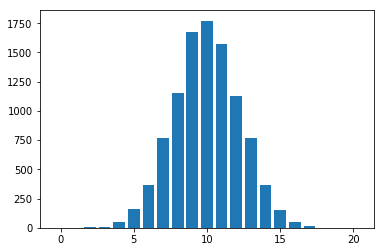

In [11]:
num_sims = 10000
flips = 20

counts = [0]*21
for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads = coins.count('H')
    counts[num_heads]+=1
    
plt.bar(range(21),counts);

In [12]:
#easiest way -- convert to numpy array
import numpy as np
np.sum(np.array(counts)/num_sims)

1.0

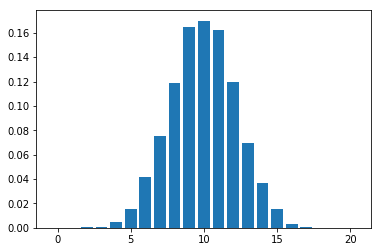

In [13]:
num_sims = 10000
flips = 20

counts = [0]*21
for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads = coins.count('H')
    counts[num_heads]+=1
    
plt.bar(range(21),np.array(counts)/num_sims);

The values don't change much once the number of simulations gets large.

**Definition** The **relative frequency** of an event is the number of times that an event occurs divided by the number of times the experiment is conducted. 

Let $N$ denote the number of experiments, and $K$ denote the number of possible outcomes. 

Let $a_i$ denote the number of times the $i$th outcome is observed.

Then 
$$ \sum_{i=1}^{K} a_i =N $$

Let $r_i$ denote the relative frequency of outcome $i$. Then
\begin{align} \sum_{i=1}^{K} r_i &= \sum_{i=1}^{K}
\frac{a_i}{N} \\
&= \frac{1}{N} \sum_{i=1}^{K} a_i \\
&=\frac{1}{N} N = 1
\end{align}



In [14]:
num_sims = 1000000
flips = 20

results = []
for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads = coins.count('H')
    results+=[num_heads]

In [15]:
np.unique(results, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([     1,     13,    214,   1066,   4685,  14896,  37117,  73815,
        120036, 159616, 176254, 160362, 120226,  73850,  37168,  14841,
          4573,   1096,    152,     19]))

In [16]:
vals,counts=np.unique(results,return_counts=True)

In [17]:
vals
counts

array([     1,     13,    214,   1066,   4685,  14896,  37117,  73815,
       120036, 159616, 176254, 160362, 120226,  73850,  37168,  14841,
         4573,   1096,    152,     19])

<BarContainer object of 20 artists>

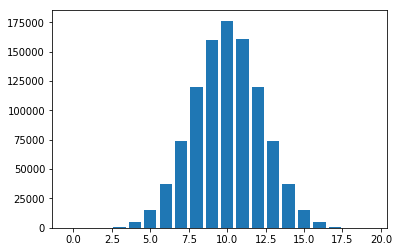

In [18]:
plt.bar(vals,counts)

<BarContainer object of 20 artists>

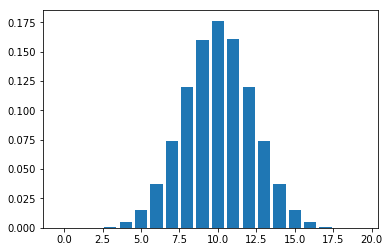

In [19]:
plt.bar(vals,counts/num_sims)

We still haven't answered our question about whether the coin is fair. Often in simulation, we don't care about determinging the relative frequencies for all the outcomes. We only care about determining the probability of some event. Let's modify the experiment to calculate the relative frequency of getting 6 or fewer heads on 20 flips of a fair coin:

In [26]:
num_sims = 1000000
flips = 20

event_count=0
for sim in range(num_sims):
    coins=random.choices(faces,k=flips)
    num_heads = coins.count('H')
    if num_heads <= 3:
        event_count+=1
        
print("Relative frequency of 3 or fewer heads is - ", event_count/num_sims)

Relative frequency of 3 or fewer heads is -  0.001291


* How does the relative frequency change with the number of experiments simulated?

* For 1M simulated experiments, what is the relative frequency of 6 or fewer heads?

* What is your conclusion about whether this could be a fair coin?

* For 1M simulated experiments, what is the relative frequency of 4 or fewer heads?

This is an example of **binary hypothesis testing**. In this case, we set up two hypothesis:

$H_0$: (the *null hypothesis*) is that the observed effect is just caused by randomness in the sampling. It is not real in the underlying system or data. For this exampe, our null hypothesis is that the coin is actually fair

$H_1$: (the *alternative hypothesis*) is that the observed effect is not just caused by random sampling. In this example, the coin is biased toward Tails.

In classical statistics/hypothesis testing, we say that an effect is statistically significant if the probability of observing an effect of that size under the null hypothesis is smaller than some small value $p$. Typical values of $p$ are 0.05 or 0.01, but many argue for even smaller values now. **The threshold to determine statistical significance must always be determined before the experiment is conducted -- otherwise, there is too much temptation to adjust the threshold based on the observed $p$-value.**

In classical hypothesis testing, we do *not* test the alternative hypothesis directly, nor can we utilize side information that we may already have about the two hypotheses

**Definition** The **probability** of an event is a number between 0 and 1 that quantifies how likely that event is to occur. An event that cannot occur has probability 0, and an event that is sure to occur has probability 1. The probabilities of the outcomes sum to 1.

**Definition** We say an experiment is **fair** if every outcome is equally likely.

Consider a fair experiment with $N$ outcomes, and let $p_i$ denote the probability of outcome $i$, then

$$
\sum_{i=1}^{N} p_i = 1 \\
\sum_{i=1}^{N} p_1 = 1 \\
Np_1=1\\
p_1 = \frac 1 N\\
p_i = \frac 1 N\\
$$

So, for instance, the probability of getting any number on a fair die is 1/6. Let's compare these to the relative frequencies: